# Assignment 15

In [ ]:
# import dependencies
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import numpy as np

In [56]:
# define functions
def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [57]:
# import and clean dataset
penguins = sns.load_dataset("penguins")
penguins.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
# split dataset
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['island'])
# print(penguins_train.shape, penguins_test.shape)

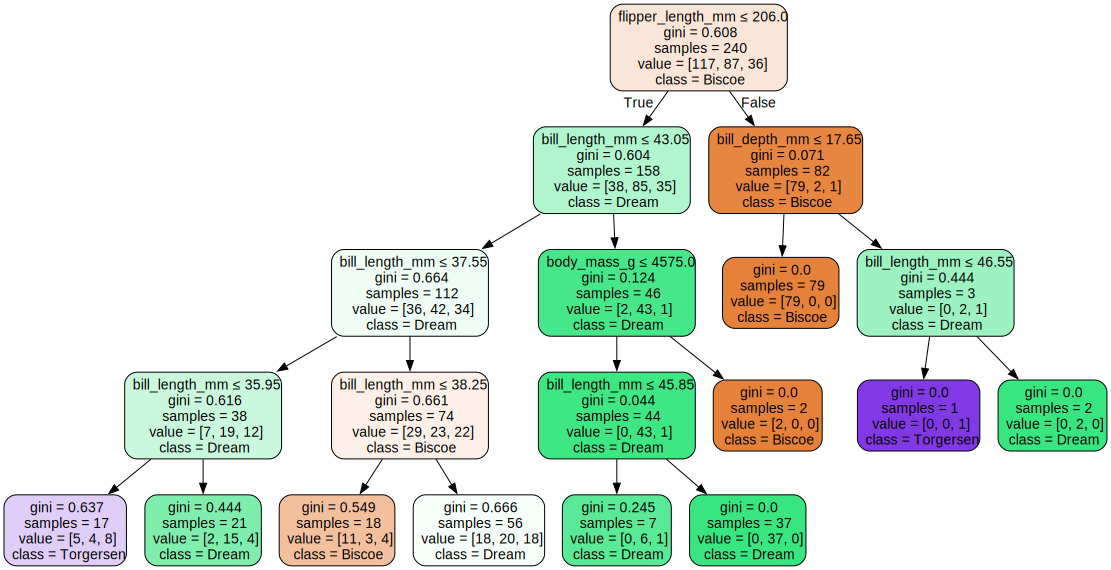

In [59]:
# create decisiontree
features= ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'bill_depth_mm']
dt_classification = DecisionTreeClassifier(max_depth = 4) # Increase max_depth to see effect in the plot
dt_classification.fit(penguins_train[features], penguins_train['island'])

plot_tree_classification(dt_classification, features, np.sort(penguins.island.unique()))


In [ ]:
# calculate accuracy of model predictions
predictionsOnTrainset = dt_classification.predict(penguins_train[features])
predictionsOnTestset = dt_classification.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.island)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.island)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.7541666666666667
Accuracy on test set 0.7884615384615384
